## Trying to solve for both $\hat\theta_0$ and $\hat\theta_1$

Let's start to explore minimizing the error as a function of *both* $\hat\theta_0, \hat\theta_1$. This error function as ever remains:

\\[
\sum_{i = 0}^N \left(\left( \hat\theta_0 + \hat\theta_1 x_i \right) - y_i \right)^2
\\]

The first thing to note is that this is still minimization of a quadratic function: the largest powers are $\hat\theta_0^2$ and $\hat\theta_1^2$, as well as also a $\hat\theta_0\hat\theta_1$ term (we will see later that this term can be quite important!).

Let's do a 3d plot to see the *error surface*. Because it is hard to read a 3d plot, I will also show you a *contour map* of the error surface. Here the axes are $\theta_0$ and $\theta_1$, and lines represent points of equal error.

Note: I have *normalized* the dataset. That means that I've changed both the $x$ and $y$ values to have a mean of zero (by subtracting the mean) and a standard deviation of 1 (by dividing by the standard deviation). This often helps to stop values from getting too large. For instance, squared error when the $y$ values are millions of dollars means squaring errors on the order of 1,000,000, which is a very large number.

The other benefit to normalizing is that it puts all quantities in approximately the same range. We'll see later that this can really help improve gradient descent.

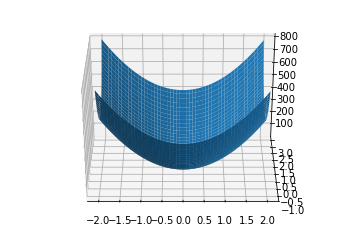

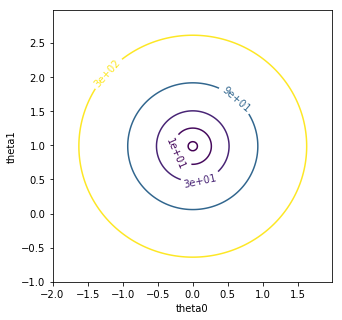

In [1]:
%matplotlib inline
from examples.multivariate_plot_example import MultivariatePlotExample

MultivariatePlotExample.run()

What we see here are a series of concentric circular contours. This corresponds to a parabolic surface. This is the 3d version of parabola problem we saw before.

## Naively extending Newton's Method

Let's try to extend our previous algorithm for finding the minimum. Here we go.

**Step 1** is to pick a random starting point $(\hat\theta_{0, 0}, \hat\theta_{0, 1})$. Note that the first index is the iteration number, and the second index is whether we are talking about the intercept or the slope. Start the iteration number at $k = 0$.

**Step 2** is to find a minimum by updating so that:

\\[
\begin{alignat*}{2}
\frac{\partial E}{\partial \hat\theta_0}(\hat\theta_{k + 1, 0}, \hat\theta_{k + 1, 1}) &= 0\\
\frac{\partial E}{\partial \hat\theta_1}(\hat\theta_{k + 1, 0}, \hat\theta_{k + 1, 1}) &= 0
\end{alignat*}
\\]

Note that the partial derivatives are each a function of *two* variables, even though we are differentiating with respect to just a single variable. Each partial derivative is the slope of the tangent line if we slice the parabolic surface at $(\hat\theta_{k + 1, 0}, \hat\theta_{k + 1, 1})$ along just one of the two axes.

Now, it can be hard to try to simultaneously update two variables together. So let's try to deconstruct this problem into two subproblems. Let's first try to update $\hat\theta_{k + 1, 0}$ so that:

\\[
\frac{\partial E}{\partial \hat\theta_0}(\hat\theta_{k + 1, 0}, \hat\theta_{k, 1}) = 0
\\]

Let's also try to update $\hat\theta_{k + 1, 1}$ so that :

\\[
\frac{\partial E}{\partial \hat\theta_1}(\hat\theta_{k, 0}, \hat\theta_{k + 1, 1}) = 0
\\]

What this is saying is: update $\hat\theta_{k + 1, 0}$ to the best it can be, as if you couldn't change $\hat\theta_{k + 1, 1}$. And, vice versa, update $\hat\theta_{k + 1, 1}$ as if you couldn't change $\hat\theta_{k + 1, 0}$. This approach tries to break down the problem of solving the next values $(\hat\theta_{k + 1, 0}, \hat\theta_{k + 1, 1})$ into two independent problems.

Let's take up zeroing $\frac{\partial E}{\partial \hat\theta_0}(\hat\theta_{k + 1, 0}, \hat\theta_{k, 1})$ first. If we are only considering changing $\hat\theta_{k + 1, 0}$ then this is effectively a quadratic function of a single variable: $\hat\theta_{k + 1, 0}$. And we know exactly how to find the zero of a quadratic function of one variable with a single update:

\\[
\hat\theta_{k + 1, 0} = \hat\theta_{k, 0} - \bigg(
  \frac{\partial E}{\partial \hat\theta_0}(\hat\theta_{k, 0}, \hat\theta_{k, 1})
\bigg) \bigg/ \bigg(
\frac{\partial^2 E}{\partial \hat\theta_0^2}(\hat\theta_{k, 0}, \hat\theta_{k, 1})
\bigg)
\\]

Likewise, we can update:

\\[
\hat\theta_{k + 1, 1} = \hat\theta_{k, 1} - \bigg(
  \frac{\partial E}{\partial \hat\theta_1}(\hat\theta_{k, 0}, \hat\theta_{k, 1})
\bigg) \bigg/ \bigg(
\frac{\partial^2 E}{\partial \hat\theta_1^2}(\hat\theta_{k, 0}, \hat\theta_{k, 1})
\bigg)
\\]

By the way we chose our updates we know that:

\\[
\begin{alignat*}{2}
\frac{\partial E}{\partial \hat\theta_0}(\hat\theta_{k + 1, 0}, \hat\theta_{k, 1}) &= 0\\
\frac{\partial E}{\partial \hat\theta_1}(\hat\theta_{k, 0}, \hat\theta_{k + 1, 1}) &= 0
\end{alignat*}
\\]

We know this because, when we look at the parabolic surface as a function of just one variable, this is a parabola. And we know that the derivative of a parabola is a line. And we know the second derivative is constant. Therefore our Newton's Method update finds the critical point in a single step.

But that is *not* quite the same as knowing:

\\[
\begin{alignat*}{2}
\frac{\partial E}{\partial \hat\theta_0}(\hat\theta_{k + 1, 0}, \hat\theta_{k + 1, 1}) &= 0\\
\frac{\partial E}{\partial \hat\theta_1}(\hat\theta_{k + 1, 0}, \hat\theta_{k + 1, 1}) &= 0
\end{alignat*}
\\]

It is a subtle difference, but we'll see how it is important.

**Step 3** is to repeat as necessary.

In [2]:
from examples.naive_multivariate_optimization_example import NaiveMultivariateOptimizationExample

NaiveMultivariateOptimizationExample.run()

The green update line shows how we find the minimum $\hat\theta_{i + 1, 0}$ for an unchanged $\hat\theta_{i, 1}$. Because the "slice" of the parabolic surface for a constant $\hat\theta_{i, 1}$ is itself a parabola, Newton's Method finds the minimum perfectly.

Likewise, the red line shows the minimum $\hat\theta_{i + 1, 1}$ for an unchanged $\hat\theta_{i, 0}$. Again, the minimum is found perfectly.

The magic happens when we combine the updates to form the blue line. This takes us directly to the minimum of the overall parabolic surface.

We cannot normally expect this combined update to work in a single step. In this case, things only worked because the updates to $\hat\theta_{i + 1, 0}$ and $\hat\theta_{i + 1, 1}$ were along the *axes* of the parabolic surface. Let's look at a case where the parabolic surface is *skewed* with respect to the axes.

To accomplish the skew, I will change the normalization of $x$ to have a mean of $1.0$ (and a standard deviation of $1.0$). I'll explain in a minute why this causes skew.

In [3]:
from examples.naive_skewed_optimization_example import NaiveSkewedOptimizationExample

NaiveSkewedOptimizationExample.run()

The first couple steps show the calculation of the update with the red and green lines. You can see that naively choosing the next $\hat\theta_{i + 1, 0}$ by minimizing with $\hat\theta_{i, 1}$ constant no longer yields an overall best solution.

In a way, this isn't that bad. We still *converge* to the right solution with enough iterations. However, zig-zagging like this will make training a very large model with many parameters much slower. It may take tens or hundreds of times as many steps to converge. That factor of extra work can be a serious problem.

What happened? Let's expand out the error function and make it more clearly a polynomial in $\hat\theta_0$ and $\hat\theta_1$:

\\[
\begin{align}
\sum_{i = 0}^N \left( \left( \hat\theta_0 + \hat\theta_1 x_i \right) - y_i \right)^2
&= \sum_{i = 0}^N \left( \hat\theta_0 + \hat\theta_1 x_i \right)^2
  - 2\left( \hat\theta_0 + \hat\theta_1 x_i \right) y_i
  + y_i^2 \\
&= \sum_{i = 0}^N \hat\theta_0^2 + 2\hat\theta_0\hat\theta_1 x_i + \hat\theta_1^2 x_i^2
  - 2\hat\theta_0 y_i - 2\hat\theta_1 x_i y_i
  + y_i^2 \\
&=
N \hat\theta_0^2 + \left(\sum 2x_i\right) \hat\theta_0 \hat\theta_1 + \left(\sum x_i^2\right) \hat\theta_1^2
- \left(\sum 2y_i\right) \hat\theta_0  - \left(\sum 2 x_i y_i\right) \hat\theta_1
+ \left(\sum y_i^2\right)
\end{align}
\\]


Here is what puts a spanner in the works: $\left(\sum 2x_i\right) \hat\theta_0 \hat\theta_1$.

Let's recall why it's so easy to update a *univariate* quadratic function. It's because the first derivative is truly a line, and thus the *second* derivative is constant and doesn't change as you move. So the Newton's Method update is precisely the right update.

In fact, if you look at the graph, the green and red steps are actually still exactly correct, provided you just consider the movement in one direction or the other.

The problem comes from putting them together. Here's the issue: when you change $\hat\theta_0$, you may change $\frac{\partial E}{\partial \hat\theta_1}$. If you do that, you throw off our naive update to $\hat\theta_1$.

That's exactly what is happening in the skewed case. It comes from $\frac{\partial^2 E}{\partial \hat\theta_0 \partial \hat\theta_1}$. That measures how much a change in $\hat\theta_0$ will have on $\frac{\partial E}{\partial \hat\theta_1}$. In particular, this term is equal to:

\\[
\frac{\partial^2 E}{\partial \hat\theta_0 \partial \hat\theta_1} = \sum 2 x_i
\\]

When this term is zero, then the naive simultaneous update works fine. Consider when we normalized the $x$ values to have a mean of zero. That means this sum is exactly zero. That's why we didn't have this problem until I normalized the mean to 1. Now this sum should be $2N$.

You might say: well, just make sure to normalize $x$ to have mean zero. And that will work in this simple case with a single $x$ predictor variable. However, in the future we will have multiple predictor variables. When these predictor variables are *uncorrelated*, then we can continue to update naively. When they are correlated, then we will face the same difficulty again: a change to one coefficient will change the slope of the error function with respect to a different coefficient.

There are ways to transform your data to remove correlations. In particular, you can look at [Principal Components Analysis](https://en.wikipedia.org/wiki/Principal_component_analysis). We will not discuss that here. In any case, while it is (fairly) easy to remove correlations in the input data at the start, it is hard to remove correlations in *internal representations*. When we learn about neural networks, we will see that they apply a series of transformations to your data. Even if your data starts out uncorrelated, the transformations may create new correlations. It is too expensive to try to keep removing these.

Therefore, even though it is best practice to remove correlations in your input data, we can't always expect that whenever we optimize a quadratic function that the mixed partials are all always zero. Thus, we can expect that zig-zagging will happen.

### Alternating updates to $\hat\theta_0$,  $\hat\theta_1$

Since the problem above results from $\frac{\partial E}{\partial \hat\theta_1}$ changing as you change $\hat\theta_0$ simultaneously, why not just optimize one, then optimize the other?

The problem is that you will still zig-zag.

In [1]:
from examples.naive_skewed_optimization_example import AlternatingMultivariateOptimizationExample

AlternatingMultivariateOptimizationExample.run()

You haven't really changed anything. Each time you update $\hat\theta_0$ (or $\hat\theta_1$), you'll move to the best value for the fixed $\hat\theta_1$ (or $\hat\theta_0$). But that update will still change $\frac{\partial E}{\partial \hat\theta_1}$ (or $\frac{\partial E}{\partial hat\theta_0}$). So even if you got $\hat\theta_1$ right on the last step, by changing $\hat\theta_0$ you've changed the partial with respect to (often written *wrt*) $\hat\theta_1$, which means you now need to fixup $\hat\theta_0$ again...

Look: these are *iterative algorithms*. We can expect that we'll have to run an optimization algorithm for multiple (possibly many) steps.

I want to make one last observation. The zig-zagging of Newton's Method isn't caused by *elliptical contours* per se. The problem is that the axes of the ellipses don't match the $\hat\theta_0, \hat\theta_1$ axes. Everything would be fine if we had elliptical contours that were alligned with the $\hat\theta_0, \hat\theta_1$ axes.